<center>                                  
<h1> Problem Statement </h1>
</center> 
 
 <h2>
  We want to investigate what are the requirements for interaction designer in San Francisco and New York by looking at data scraped from indeed.com. 
  We find the common skills required in these two markets. 
  </h2>

In [ ]:
We investigate what skills are important in each market but most importantly "why" they might be.  Is there anything else different from New York vs San Francisco that we can draw on

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cross_validation import train_test_split

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<h1> 1. San Francisco
</h1>

<h2> 
Using scrapy, we engineer the code to get the summary and title of the postings from indeed.com. 
 We use XPatch Checker plugin in Chrome to find the xpath of the elements in the web page for
 the summary field and title field. 
 </h2>

<h2>
Here's the code for the XPaths used
</h2>

![](indeed_spider_xpath.png)

<h2>
Here's the code for the urls used
</h2>

![](indeed_spider_urls.png)

<h2>
We then used the code to obtain the data below. 
</h2>

In [3]:
# This is for UX/UI Interaction Designers - SF
indeed_sf_data = pd.read_csv('indeed_ux_sf.csv')

In [4]:
indeed_sf_df = pd.DataFrame(indeed_sf_data)

In [5]:
indeed_sf_df.head(3)

,title,summary
0,"User Experience Researcher, Uber Freight",Our research will make the process of moving r...
1,Interaction Designer,\nWe follow a simple but vital premise on UX t...
2,Design,\nExperience collaborating with UX Designers/R...


In [6]:
title1= indeed_sf_df['title'][0]

In [7]:
title1

'User Experience Researcher, Uber Freight'

In [8]:
summary1  = indeed_sf_df['summary'][0]

In [9]:
summary1

'Our research will make the process of moving real assets and real people safer and more efficient now, and in the decades to come.Uber ATG UX Research Team is...'

In [10]:
indeed_sf_df.shape

(444, 2)

<h2>
We will use CountVectorizer from the sklearn package  to analyze the data.  
</h2>

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cvec1 = CountVectorizer()
cvec1.fit(indeed_sf_df['summary'])

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [12]:
df1  = pd.DataFrame(cvec1.transform(indeed_sf_df['summary']).todense())

<h2>
The raw data looks like this: 
</h2>

In [13]:
df1.transpose().sort_values(0, ascending=False).head(10).transpose().head(3)

,44,764,775,915,1014,501,615,635,971,209
0,3,2,2,2,1,1,1,1,1,1
1,2,0,0,1,0,0,0,0,2,0
2,3,0,0,0,0,0,0,0,1,0


In [14]:
X = cvec1.fit_transform(indeed_sf_df['summary'])

In [15]:
y = indeed_sf_df['title'].values

In [16]:
X.shape, y.shape

((444, 1034), (444,))

<h2>
We will build a training data set from 40% of the full data set. 
Then, we will use the remaining 60% as test set
</h2>

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

 <h2>
 We will run Logistic Regression on this set. 
 </h2>

In [18]:
logreg = LogisticRegression()

In [19]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<h2>
Now that we trained on the subset, we can now run prediction on the test subset.
</h2>

In [20]:
df_predict = logreg.predict(X_test)

In [21]:
df_predict[13]

'Product Designer'

<h2>
Here is our score on this set
</h2>

In [22]:
df_score = logreg.score(X_test, y_test)

In [29]:
df_score

0.6741573033707865

<h2>
Now we run the analysis more discrimination, splitting data more carefully
</h2>

In [31]:
# set ngram_range up to 3, to catch phrases like 'nat lang proc'
cvec2 = CountVectorizer(stop_words = 'english', ngram_range=(1,3))

In [32]:
indeed_sf_df['title']= indeed_sf_df['title'].map(lambda x: x.strip())

In [33]:
indeed_sf_df['summary'] = indeed_sf_df['summary'].map(lambda x: x.strip())

In [34]:
indeed_sf_df['ux_ui_designer'] = indeed_sf_df['title'].map(lambda x: 1 if 'UX/UI designer'
                                in x.lower() else 0)

In [35]:
#indeed_sf_df['ux_ui_designer']

In [36]:
indeed_sf_df['interaction_designer'] = indeed_sf_df['title'].map(lambda x: 1 if 
                            'interaction designer' in x.lower() else 0)

In [37]:
#indeed_sf_df['interaction_designer']

In [38]:
X2 = cvec2.fit_transform(indeed_sf_df['summary'])

In [39]:
y2 =  indeed_sf_df['interaction_designer']

In [40]:
y2.shape, X2.shape

((444,), (444, 5229))

<h2>
We run new traing and testing on the new data. 
</h2>

In [41]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.4)

<h2>
We have a new Logistic Regression training
</h2>

In [42]:
logreg2 = LogisticRegression()

In [43]:
logreg2.fit(X_train2, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<h2>
The new predictions and score is better now: 
</h2>

In [44]:
df_predict2 = logreg2.predict(X_test2)

In [45]:
logreg2.score(X_test2, y_test2)

0.97752808988764039

In [46]:
X3  = pd.DataFrame(cvec2.fit_transform(indeed_sf_df.summary).todense(),
            columns=cvec2.get_feature_names())

X3.transpose().sort_values(0, ascending=False).head(100).transpose().head(5)

,research,real,uber,come uber atg,process moving,process moving real,research team,research make process,ux research,research make,...,product designer,product designer able,product designer bring,product designer committed,process looking,process believe iterative,product designer utilize,10,product designer ve,profile
0,2,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2>
Here are some of the columns we get
</h2>

In [47]:
X3.columns

Index([u'10', u'10 engineers', u'10 engineers 100', u'100', u'100 people',
       u'100 people location', u'107', u'12', u'12 months', u'12 months job',
       ...
       u'years ux ui', u'years work', u'years work experience', u'yelp',
       u'yelp conquer', u'yelp conquer challenging', u'york', u'zendesk',
       u'zendesk looking', u'zendesk looking product'],
      dtype='object', length=5229)

<h2>
We create a dictionary of these skills we found: 
</h2>

In [48]:
interaction_designer_dic = {
                    'research':0,
                    'uber':0,
                    'yelp':0,
                    'years ux ui':0,
                    'process moving':0,
                    'research team':0,
                    'ux research':0,
                    'product designer':0,
                    'process looking':0,
                    'profile':0
}

for c in X3.columns:
    for key in interaction_designer_dic:
        if key in c.lower():
            interaction_designer_dic[key] += 1

print interaction_designer_dic

{'uber': 6, 'profile': 8, 'product designer': 36, 'yelp': 6, 'research team': 2, 'ux research': 20, 'years ux ui': 1, 'process looking': 4, 'process moving': 3, 'research': 102}


<h2>
Here is what they look like: 
</h2>

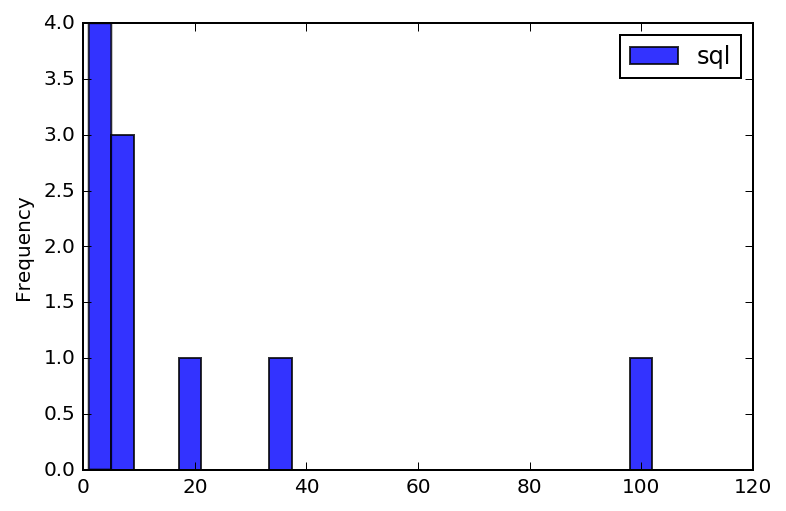

In [49]:
ax = pd.DataFrame({'sql': interaction_designer_dic}).plot(kind='hist', bins=25, alpha=0.8)
plt.show()

In [50]:
interaction_designer_df = pd.DataFrame.from_dict(interaction_designer_dic.items())

<h2>
Or in matplot, they look like this: 
</h2>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e8c9d10>]], dtype=object)

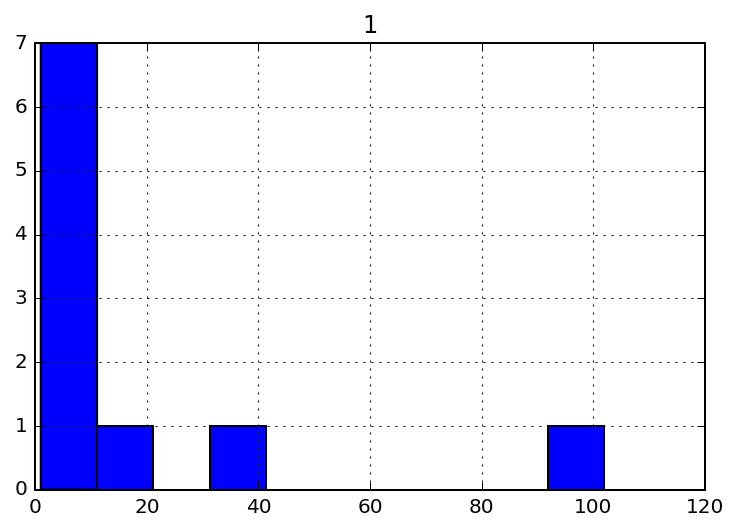

In [51]:
interaction_designer_df.hist()

## 2.  New York

<h2>
We look now at the New York data. 
</h2>

In [52]:
# This is for UX/UI Interaction Designers - NY
indeed_ny_data = pd.read_csv('indeed_ux_ny.csv')

In [53]:
indeed_ny_df = pd.DataFrame(indeed_ny_data)

In [54]:
indeed_ny_df.head(3)

,title,summary
0,Service Experience Designer,Service Experience Designer*. As a Service Exp...
1,User Experience Designer - Data Distribution a...,\nThis position is for a thoughtful UX Designe...
2,UX Designer,\nCollaborate with an Interaction Designer to ...


In [55]:
title2=indeed_ny_df['title'][0]

In [56]:
title2

'Service Experience Designer'

In [57]:
summary2  = indeed_ny_df['summary'][0]

In [58]:
summary2

'Service Experience Designer*. As a Service Experience Designer You Will*. Neighborhood Trust seeks a Service Experience Designer to join our Programs & Business...'

In [59]:
indeed_ny_df.shape

(240, 2)

<h2>
We use CountVectorizer to look at 'summary' and then fit that data. 
</h2>

In [60]:
cvec3 = CountVectorizer()
cvec3.fit(indeed_ny_df['summary'])

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

<h2>
We pre-process before running train and test on the data. 
</h2>

df3  = pd.DataFrame(cvec3.transform(indeed_ny_df['summary']).todense())

In [62]:
df3.transpose().sort_values(0, ascending=False).head(10).transpose().head(3)

,852,361,253,643,59,970,113,757,1052,984
0,3,3,3,1,1,1,1,1,1,1
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,1,2,0,0,0,0


In [63]:
XX = cvec3.fit_transform(indeed_ny_df['summary'])

In [64]:
yy = indeed_ny_df['title'].values

In [65]:
XX.shape, yy.shape

((240, 1076), (240,))

<h2>
Now we run the train test split, training on 40% of the data. 
</h2>

XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.4)

<h2>
We run Logistic Regression and fit on the training data.
</h2>

In [67]:
logreg1 = LogisticRegression()

In [68]:
logreg1.fit(XX_train, yy_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<h2>
Then we run the prediction and score on the test data. 
</h2>

In [69]:
df_predict1 = logreg1.predict(XX_test)

In [70]:
df_predict1[3]

'UX Designer'

In [71]:
df_score1 = logreg1.score(XX_test, yy_test)

In [72]:
df_score1

0.17708333333333334

<h3>
The score was not that great. 
</h3>

<h2>
Let me do a more detailed analysis, looking at up to 3 words. 
</h2>

In [73]:
cvec4 = CountVectorizer(stop_words = 'english', ngram_range=(1,3))

In [74]:
indeed_ny_df['title']= indeed_ny_df['title'].map(lambda x: x.strip())

In [75]:
indeed_ny_df['summary'] = indeed_ny_df['summary'].map(lambda x: x.strip())

In [76]:
indeed_ny_df['interaction_designer'] = indeed_ny_df['title'].map(lambda x: 1 if 
                            'interaction designer' in x.lower() else 0)

In [77]:
X4 = cvec4.fit_transform(indeed_ny_df['summary'])

In [78]:
y4 =  indeed_ny_df['interaction_designer']

In [79]:
y4.shape, X4.shape

((240,), (240, 5450))

In [80]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.4)

In [81]:
logreg4 = LogisticRegression()

In [82]:
logreg4.fit(X_train4, y_train4)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
df_predict4 = logreg4.predict(X_test4)

In [84]:
logreg4.score(X_test4, y_test4)

0.98958333333333337

<h3>
We get a much better score now. 
</h3>

<h2>
A sample of the words discovered in this way. 
</h2>

In [85]:
X5  = pd.DataFrame(cvec4.fit_transform(indeed_ny_df.summary).todense(),
            columns=cvec4.get_feature_names())

X5.transpose().sort_values(0, ascending=False).head(100).transpose().head(5)

,service experience,designer,experience,experience designer,service,service experience designer,neighborhood trust seeks,neighborhood,trust,trust seeks,...,product innovation tweaking,product designers,product innovation,product gets creative,product gets,product engineering establish,product engineering,product development process,product development,product designers researchers
0,3,3,3,3,3,3,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
for c in X5.columns:
    for key in interaction_designer_dic:
        if key in c.lower():
            interaction_designer_dic[key] += 1

print interaction_designer_dic

{'uber': 6, 'profile': 8, 'product designer': 108, 'yelp': 6, 'research team': 12, 'ux research': 48, 'years ux ui': 1, 'process looking': 4, 'process moving': 3, 'research': 276}


<h2>
Here's a plot of the results:
</h2>

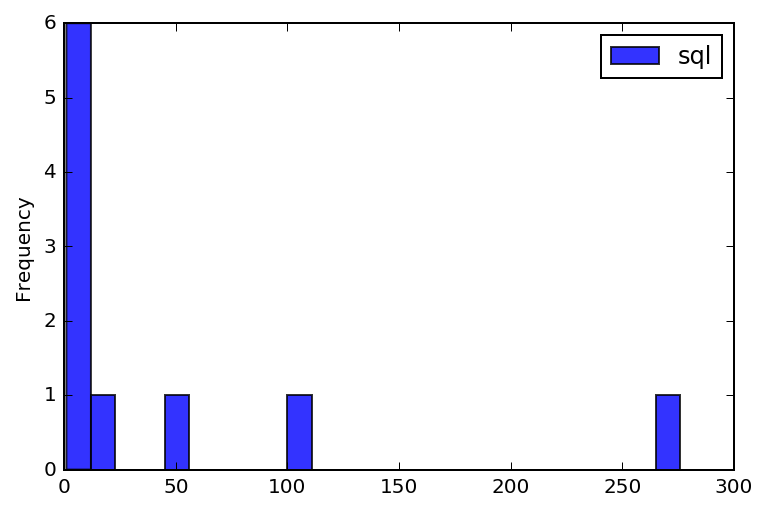

In [88]:
ax = pd.DataFrame({'sql': interaction_designer_dic}).plot(kind='hist', bins=25, alpha=0.8)
plt.show()

<h2>
And now in histogram form
</h2>

In [89]:
interaction_designer_df = pd.DataFrame.from_dict(interaction_designer_dic.items())

![](indeed_ny_hist.png)

<center>
<h1>
3. Analysis
</h1>
</center>

<h2>
The main take-away is that NY has a lot more research positions, 276 to SF's 102
and more product designer, 108, to SF's 36. NY also has more research team positions, 12, to SF's 2, and NY has 48 research positions to SF's 20. 
</h2>